In [1]:
import pandas as pd

In [68]:
data1 = pd.read_csv("csc_threads.csv")[['id', 'author', 'selftext','created_utc', 'score']]

In [69]:
data1['sub_id'] = data1['id']
data1['parent_id']='Null'

In [70]:
data1.shape

(33011, 7)

In [71]:
data1.head(5)

,id,author,selftext,created_utc,score,sub_id,parent_id
0,ko57ok,BucksThirtyFour,"So at the moment I work in a factory, 7 days a...",1609476460,1,ko57ok,Null
1,ko54fe,LilithMoonlight,"Hello all,\nI was applying to many different c...",1609476032,1,ko54fe,Null
2,ko4zqu,Spycii,"I’m a sophomore headed into my 2nd semester, m...",1609475439,1,ko4zqu,Null
3,ko4wmt,EasyPapaya,College student applying for internships. Whic...,1609475031,1,ko4wmt,Null
4,ko4hw1,buggs_bunnee,Before I start telling you about my situation ...,1609473210,1,ko4hw1,Null


In [72]:
data2 = pd.read_csv("csc_comm.csv")[['author', 'parent_id', 'sub_id','id', 'selftext','created_utc', 'score']]

In [73]:
from datetime import datetime
data2['created_utc'] = data2['created_utc'].apply(lambda x: datetime.fromtimestamp(x).isoformat())

In [74]:
data2['parent_id'] = data2['parent_id'].str.replace("t1_","")
data2['parent_id'] = data2['parent_id'].str.replace("t3_","")

In [75]:
data2.shape

(399225, 7)

In [76]:
data_combo = pd.concat([data1, data2])

C:\Users\Sree\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [77]:
data_combo = data_combo.dropna(subset=['author'])

In [78]:
data_combo.shape

(392287, 7)

In [79]:
data_combo = data_combo.sort_values(by=['sub_id'])

In [80]:
data_combo.head(5)

,author,created_utc,id,parent_id,score,selftext,sub_id
399223,The_Sacred_Cow,2019-11-27T17:47:13,f8wnard,f8whgiu,2,What self study certifications were the bigges...,e2mgye
33010,The_Sacred_Cow,1574887455,e2mgye,Null,1,I wasn't quite sure where to post this questio...,e2mgye
399221,ayyyyy,2019-11-27T15:48:57,f8wcj3g,e2mgye,-1,"What I've sadly learned is that, if you don't ...",e2mgye
399219,housebabyy,2019-11-27T16:47:11,f8whz87,e2mgye,7,Dropping out of college is incredibly stupid i...,e2mgye
399218,weather_babe,2019-11-27T16:37:13,f8wh24k,e2mgye,10,Enroll in the compsci program at your universi...,e2mgye


In [81]:
id_author = dict(zip(data_combo['id'], data_combo['author']))
id_parent = dict(zip(data_combo['id'], data_combo['parent_id']))

In [82]:
ids = data_combo['id'].to_list()

In [83]:
# who replies to whom?
final_data = {'src':[], 'target':[]}
for i in ids:
    cur_parent = id_parent[i]
    cur_auth = id_author[i]
    if cur_parent != 'Null' and cur_parent in id_author.keys(): # if any rows are dropped their children are also dropped
        final_data['src'].append(cur_auth)
        parent_author = id_author[cur_parent]
        final_data['target'].append(parent_author)

In [84]:
final_data = pd.DataFrame(final_data)

In [85]:
final_data.head(20)

,src,target
0,ayyyyy,The_Sacred_Cow
1,housebabyy,The_Sacred_Cow
2,weather_babe,The_Sacred_Cow
3,sarchiapone666,housebabyy
4,timmyotc,sarchiapone666
5,housebabyy,sarchiapone666
6,housebabyy,sarchiapone666
7,sarchiapone666,housebabyy
8,housebabyy,sarchiapone666
9,sarchiapone666,housebabyy


In [86]:
final_data.shape

(311875, 2)

In [87]:
#remove self loops
final_data = final_data[final_data['src']!=final_data['target']]

In [88]:
final_data['weight'] = 1

In [89]:
final_data.head(10)

,src,target,weight
0,ayyyyy,The_Sacred_Cow,1
1,housebabyy,The_Sacred_Cow,1
2,weather_babe,The_Sacred_Cow,1
3,sarchiapone666,housebabyy,1
4,timmyotc,sarchiapone666,1
5,housebabyy,sarchiapone666,1
6,housebabyy,sarchiapone666,1
7,sarchiapone666,housebabyy,1
8,housebabyy,sarchiapone666,1
9,sarchiapone666,housebabyy,1


In [90]:
final_map = final_data.groupby(['src', 'target']).sum().reset_index()

In [91]:
final_map.shape

(262740, 3)

In [92]:
final_map = final_map.sort_values(by=['weight'])

In [93]:
final_map[final_map['weight']>=2]

,src,target,weight
106753,TwoDoorSedan,TheDiscoJew,2
140684,codex561,Himekat,2
239233,terjon,flotation,2
21142,ConfoundingChaos,SugarAndSodaDiet,2
107438,UnexpectedWilde,_Atomfinger_,2
240192,that_routine,xxbcbud420xx,2
20950,ComputerBunnyMath123,SerendipityNinetyOne,2
239617,termd,spectacularkay,2
19239,ChooseMars,Yosaerys,2
140350,coder155ml,Nintendo_Chemistry,2


In [94]:
final_map = final_map[final_map['src']!=final_map['target']]

In [95]:
final_map['weight'] = final_map['weight'] /final_map['weight'].abs().max()

In [96]:
final_map.shape

(262740, 3)

In [97]:
final_map.head()

,src,target,weight
0,-------hi-------,DragonCode2020,0.002924
169679,hereforthedoggo,macguggins254,0.002924
169680,hereforthedoggo,pmmeyourpuzzlespls,0.002924
169681,hereforthedoggo,sidd_oo,0.002924
169682,heres-the-reference,BackgroundChar,0.002924


In [98]:
final_map.to_csv("csc_2018_2021_halfsns.csv")

In [155]:
import networkx as nx

In [156]:
ggw_nx=nx.DiGraph()

In [157]:
tupl = [tuple(r) for r in final_map.to_numpy().tolist()]

In [158]:
ggw_nx.add_weighted_edges_from(tupl)

In [159]:
import matplotlib.pyplot as plt

C:\Users\Sree\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Sree\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


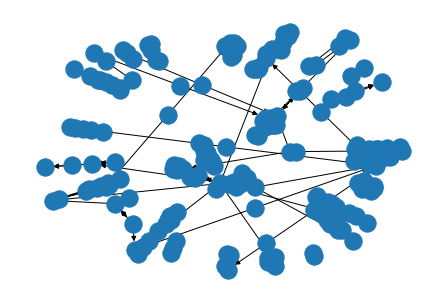

In [160]:
nx.draw_spring(ggw_nx, with_labels = False)

In [99]:
data_combo.shape

(392287, 7)

In [100]:
data_combo.to_csv("csc_final.csv")